In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')
%matplotlib inline

In [0]:
train = pd.read_csv('/content/drive/My Drive/DataScience(All)/Exploratory_data_analysis/Project_ EDA/churn_prediction.csv')

In [0]:
print('dataset has {} Number of rows and {} number of columns'.\
      format(train.shape[0],train.shape[1]))

dataset has 28382 Number of rows and 21 number of columns


In [0]:
#let's have a look at the head
train.head(10)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
5,7,263,42,Female,0.0,self_employed,1096.0,2,1666,60.0,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
6,8,5922,72,Male,0.0,retired,1020.0,1,1,98.0,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
7,9,1145,46,Male,0.0,self_employed,623.0,2,317,172.0,10096.58,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
8,10,2132,31,Male,0.0,salaried,1096.0,2,4110,19.0,1355.86,1355.86,1702.44,1126.13,714.51,121.09,714.51,359.44,1183.45,1857.42,0
9,11,3379,40,Male,3.0,self_employed,1020.0,2,38,0.0,4957.95,4244.38,2168.53,1864.33,6912.29,4206.13,1887.30,1348.85,1823.16,2416.69,0


In [0]:
train.info()  #checks the informarion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
customer_id                       28382 non-null int64
vintage                           28382 non-null int64
age                               28382 non-null int64
gender                            27857 non-null object
dependents                        25919 non-null float64
occupation                        28302 non-null object
city                              27579 non-null float64
customer_nw_category              28382 non-null int64
branch_code                       28382 non-null int64
days_since_last_transaction       25159 non-null float64
current_balance                   28382 non-null float64
previous_month_end_balance        28382 non-null float64
average_monthly_balance_prevQ     28382 non-null float64
average_monthly_balance_prevQ2    28382 non-null float64
current_month_credit              28382 non-null float64
previous_month_credit             28382 non-null

We can see the datatypes of the features in our dataset and the number of non-null values.
There are some null values in some of the columns. We have to deal with them. 

In [0]:
#Let's have a look at the target column
train['churn'].value_counts(normalize=True)

0    0.814671
1    0.185329
Name: churn, dtype: float64

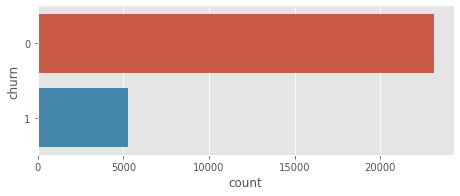

In [0]:
#let's visualize it
ax = sns.catplot(y='churn',kind ='count',data=train,height=2.6,aspect=2.5)

In target column we have almost 82% as 0 and 18% as 1. so there's class imbalance in our dataset.

In [0]:
#now let's look at some variables one by one
train.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [0]:
#customer id is just the unique id given to the customers it has no use in building model so we can drop it
train.drop('customer_id',axis=1,inplace=True)

In [0]:
numericals = ['vintage','age','dependents','customer_nw_category','days_since_last_transaction','current_balance','previous_month_end_balance',\
              'average_monthly_balance_prevQ','average_monthly_balance_prevQ2','current_month_credit','previous_month_credit','current_month_debit',\
              'previous_month_debit','current_month_balance','previous_month_balance']

In [0]:
train[numericals].describe()

,vintage,age,dependents,customer_nw_category,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
count,28382.000000,28382.000000,25919.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04
mean,2364.336446,48.208336,0.347236,2.225530,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03
std,1610.124506,17.807163,0.997661,0.660443,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04
min,180.000000,1.000000,0.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03
25%,1121.000000,36.000000,0.000000,2.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03
50%,2018.000000,46.000000,0.000000,2.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03
75%,3176.000000,60.000000,0.000000,3.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03
max,12899.000000,90.000000,52.000000,3.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06


We have got a descriptive statsitics of all the numerical columns.

In [0]:
train.groupby('customer_nw_category')['current_balance'].mean()

customer_nw_category
1    12883.682913
2     7773.279345
3     4795.520175
Name: current_balance, dtype: float64

In [0]:
cols =['current_balance','previous_month_end_balance','average_monthly_balance_prevQ','average_monthly_balance_prevQ2',\
       'current_month_credit','previous_month_credit','current_month_debit','previous_month_debit','current_month_balance',\
       'previous_month_balance']
train.groupby('customer_nw_category')[cols].mean()

,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
customer_nw_category,,,,,,,,,,
1,12883.682913,13436.613544,13098.982716,11810.444511,7728.400137,9409.866028,7911.434080,8086.710342,12878.068674,13242.281037
2,7773.279345,7744.492544,7839.095235,7433.073141,3749.500743,2893.806560,3894.684063,3163.730233,7858.371677,7794.672359
3,4795.520175,4957.438675,4947.972060,4959.714499,1401.650598,1535.054349,1758.351527,1851.125018,4873.170891,4954.843500


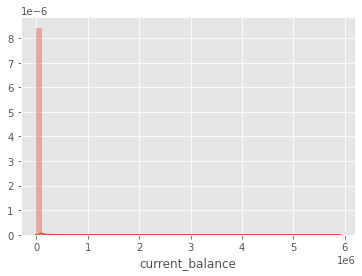

In [0]:
sns.distplot(train['current_balance'])

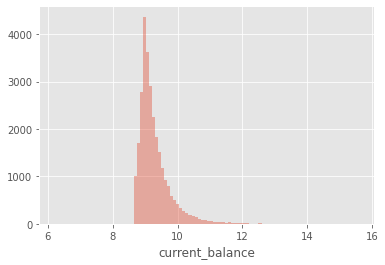

In [0]:
temp = np.log(train['current_balance'] + 6000)
ax=sns.distplot(temp,bins=100,kde=False)

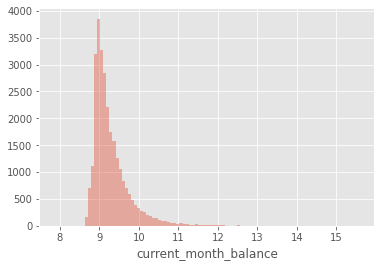

In [0]:
temp = np.log(train['current_month_balance'] + 6000)
ax=sns.distplot(temp,bins=100,kde=False)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


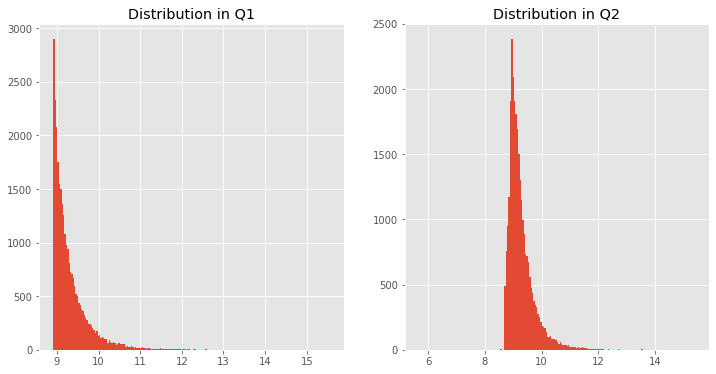

In [0]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

ax1.set(title='Distribution in Q1')
ax1.hist(np.log(train['average_monthly_balance_prevQ'] + 6000),bins=200)

ax2.set(title='Distribution in Q2')
ax2.hist(np.log(train['average_monthly_balance_prevQ2'] + 6000),bins=200)

plt.show()

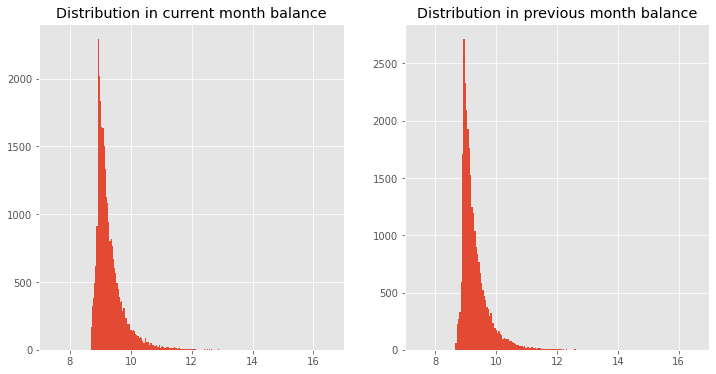

In [0]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

ax1.set(title='Distribution in current month balance')
ax1.hist(np.log(train['current_month_balance'] + 6000),bins=200)
ax1.set_xlim(7,17)

ax2.set(title='Distribution in previous month balance')
ax2.hist(np.log(train['previous_month_balance'] + 6000),bins=200)
ax2.set_xlim(7,17)

plt.show()

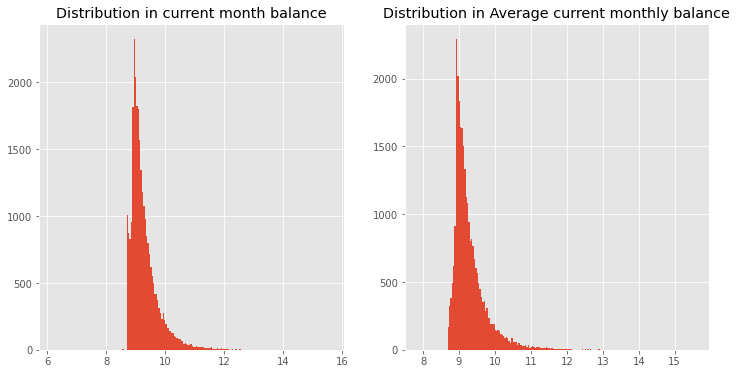

In [0]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

ax1.set(title='Distribution in current month balance')
ax1.hist(np.log(train['current_balance'] + 6000),bins=200)

ax2.set(title='Distribution in Average current monthly balance')
ax2.hist(np.log(train['current_month_balance'] + 6000),bins=200)

plt.show()

##Bivariate Analysis

In [0]:
cd_db_cls = ['previous_month_credit','current_month_credit',\
             'previous_month_debit','current_month_debit']

In [0]:
df = pd.DataFrame()

In [0]:
for i in cd_db_cls:
  df[str('log_') + i] = np.log(train[i])

In [0]:
df

,log_previous_month_credit,log_current_month_credit,log_previous_month_debit,log_current_month_debit
0,-1.609438,-1.609438,-1.609438,-1.609438
1,-0.579818,-0.579818,4.610755,8.610004
2,-0.494296,-0.494296,5.557716,8.707273
3,-0.755023,-0.755023,7.670116,-0.755023
4,6.571737,-1.108663,7.338277,6.377781
...,...,...,...,...
28377,-1.203973,-1.203973,-1.203973,-1.203973
28378,0.828552,0.536493,6.921727,6.803505
28379,8.264379,8.448237,4.273884,5.125332
28380,-1.609438,-1.609438,-1.609438,-1.609438


In [0]:
log_cd_db_cols = df.columns

In [0]:
df['churn'] = train['churn']

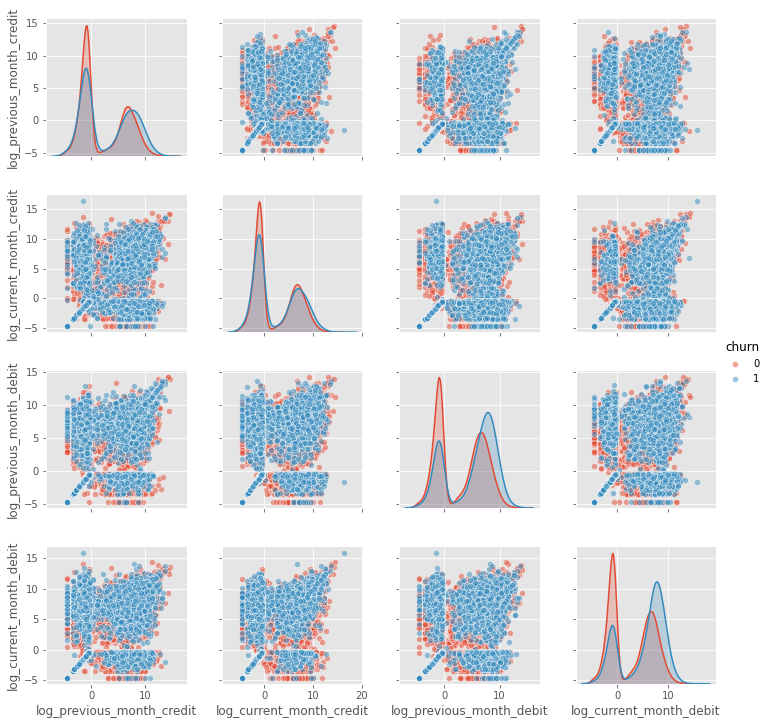

In [0]:
sns.pairplot(df,vars=log_cd_db_cols,hue='churn',plot_kws={'alpha':0.5})

In [0]:
train['average_monthly_balance_prevQ2'].min()

-16506.1

In [0]:
QD = pd.DataFrame()
QD['x'] = np.log(train['average_monthly_balance_prevQ'] + 17000)
QD['y'] = np.log(train['average_monthly_balance_prevQ2'] + 17000)
QD['churn'] = train['churn']


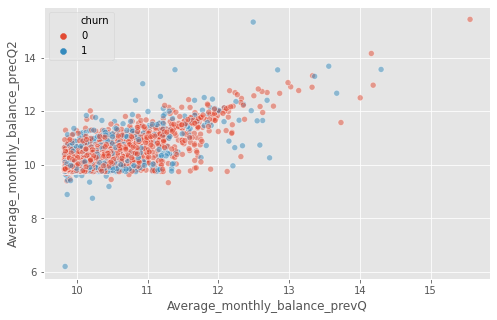

In [0]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='x',y='y',hue='churn',alpha=0.5,data=QD)
plt.xlabel('Average_monthly_balance_prevQ')
plt.ylabel('Average_monthly_balance_precQ2')
plt.show()

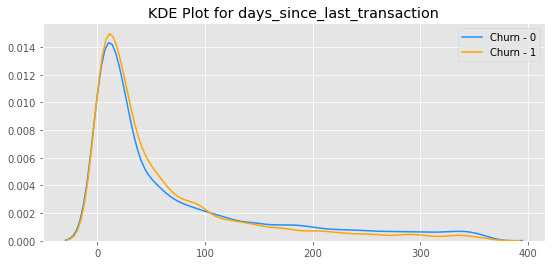

In [0]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE Plot for {}".format(feature))
    ax0 = sns.kdeplot(train[train['churn'] == 0][feature].dropna(), color= 'dodgerblue', label= 'Churn - 0')
    ax1 = sns.kdeplot(train[train['churn'] == 1][feature].dropna(), color= 'orange', label= 'Churn - 1')

kdeplot('days_since_last_transaction')

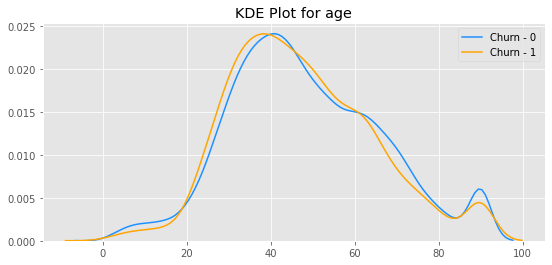

In [0]:
kdeplot('age')

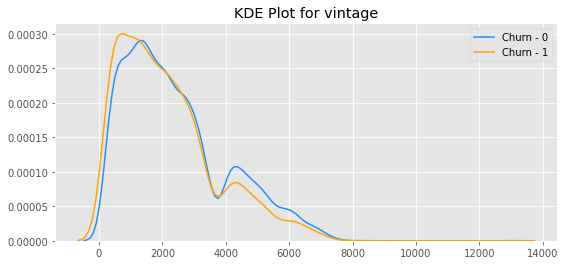

In [0]:
kdeplot('vintage')

#Categorical Features

In [0]:
cat_cols = ['gender','occupation','city','branch_code']
df_cat_cols = train[cat_cols]

In [0]:
#check the number of unique values
df_cat_cols.apply(lambda x: x.nunique())

gender            2
occupation        5
city           1604
branch_code    3185
dtype: int64

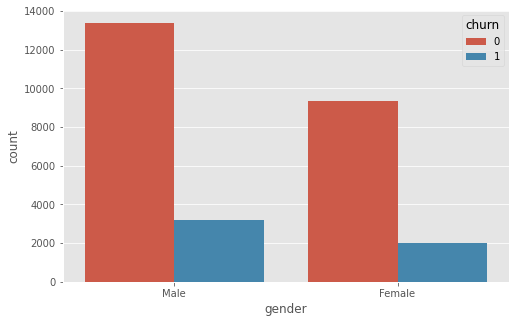

In [0]:
plt.figure(figsize = (8,5) )
sns.countplot(df_cat_cols['gender'],hue=train['churn'])
plt.show()

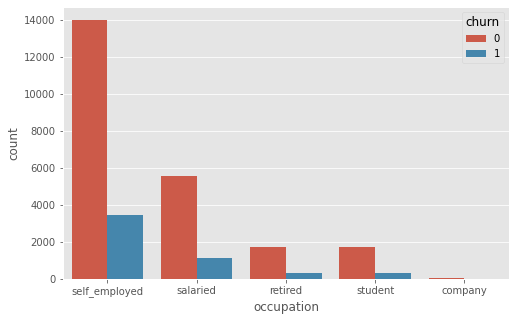

In [0]:
plt.figure(figsize=(8,5))
sns.countplot(df_cat_cols['occupation'],hue=train['churn'])
plt.show()

In [0]:
train['city'].value_counts().head(20)

1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
334.0      930
1232.0     840
623.0      778
15.0       669
575.0      631
1525.0     375
905.0      345
491.0      312
1111.0     312
1494.0     289
649.0      281
1589.0     251
318.0      245
1084.0     240
61.0       237
Name: city, dtype: int64

In [0]:
train['city'].describe()

count    27579.000000
mean       796.109576
std        432.872102
min          0.000000
25%        409.000000
50%        834.000000
75%       1096.000000
max       1649.000000
Name: city, dtype: float64

In [0]:
#let's divide the city into 4 bins
label = ['0','1','2','3']
cut_bins = [0,100,350,900,3479]
train['city_bins'] = pd.cut(train['city'],bins=cut_bins,labels=label)

In [0]:
train['city_bins'].value_counts()

3    13325
2     8809
1     3888
0     1541
Name: city_bins, dtype: int64

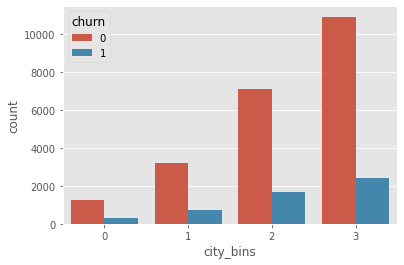

In [0]:
sns.countplot(train['city_bins'],hue=train['churn'])

In [0]:
train['branch_code'].value_counts().head(20)

19     145
6      142
60     128
16     111
8      109
92     105
27      96
79      93
88      93
47      93
15      92
33      91
1       91
54      90
13      90
3       89
501     89
145     89
5       83
7       82
Name: branch_code, dtype: int64

In [0]:
labels_b = ['0','1','2']
cut_b = [0,50,100,145]
train['branch_code_bins'] = pd.cut(train['branch_code'],bins=cut_b, labels = labels_b)

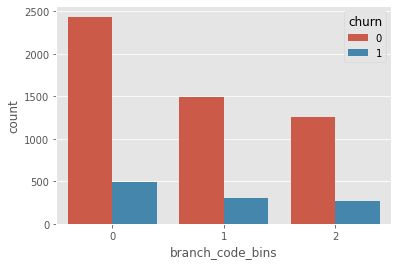

In [0]:
ax = sns.countplot(train['branch_code_bins'],hue=train['churn'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


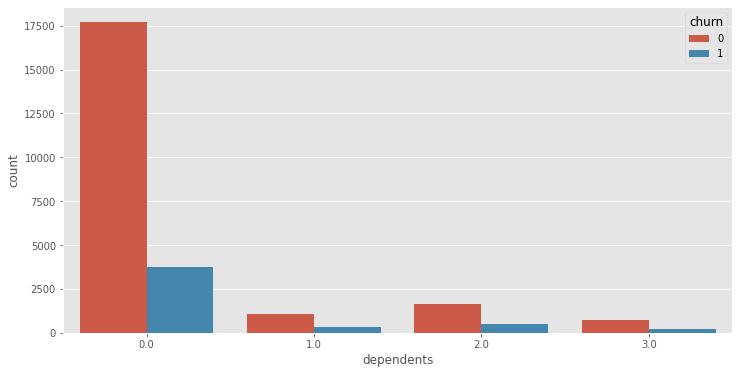

In [0]:
plt.figure(figsize=(12,6))
train['dependents'][train['dependents'] > 3] = 3 
ax = sns.countplot(train['dependents'],hue = train['churn'])

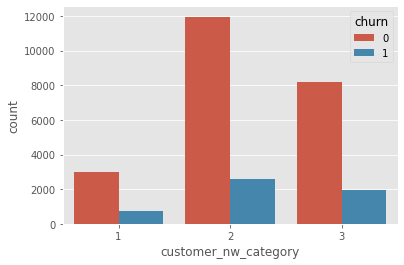

In [0]:
ax = sns.countplot(train['customer_nw_category'],hue=train['churn'])

In [0]:
corr = train.corr()

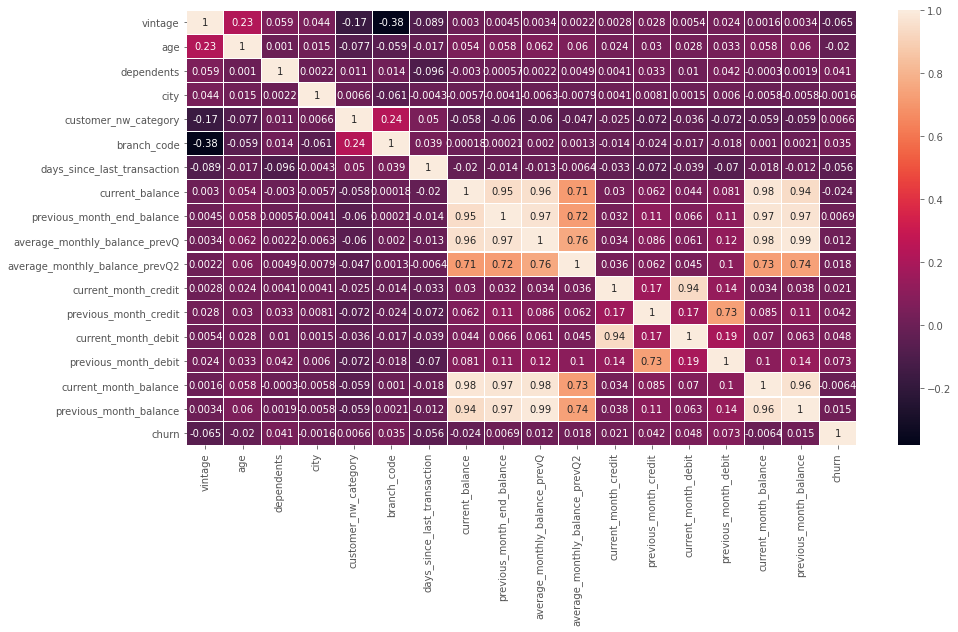

In [0]:
plt.figure(figsize=(15,8))
ax = sns.heatmap(corr,xticklabels=corr.columns,yticklabels = corr.columns,
            linewidths=.2,annot=True)